In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('datasets/IBOV_23-10-25.csv', sep = ';')
dataset.index = dataset['Ticker']
dataset = dataset[['YaHoo']]

fullData = {}

# for any ticker at B3 (Brazilian Stock Exchange)
for ticker, code in dataset.iterrows():

    print(f"Downloading data for {ticker} (YaHoo: {code['YaHoo']})")

    df = yf.download(code['YaHoo'], start = "2010-01-01", end = "2025-10-23", progress = False, auto_adjust = True)

    fullData[ticker] = df

# The obtained data is stored in the fullData dictionary
# This is an example of accessing the data for a specific ticker
# For example, to access data for PETR4 (Petrobras):
fullData['PETR4']

Price,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,
2010-01-04,8.382707,8.382707,8.270398,8.299599,13303600
2010-01-05,8.310827,8.407413,8.265904,8.396182,21396400
2010-01-06,8.423138,8.423138,8.265906,8.265906,18720600
2010-01-07,8.344523,8.411908,8.326554,8.371477,10964600
2010-01-08,8.299597,8.398428,8.279381,8.346766,14624200
...,...,...,...,...,...
2025-10-16,29.450001,29.809999,29.410000,29.740000,28660900
2025-10-17,29.730000,29.950001,29.309999,29.500000,36238600


In [2]:
# Crating a single DataFrame with the closing prices of all tickers
closingPrices = pd.DataFrame()

for ticker, df in fullData.items():
    aux = df['Close'].copy()
    aux.columns = [ticker]
    closingPrices = pd.concat([closingPrices, aux], axis = 1)

closingPrices.index = closingPrices.index.tolist()

# Sorting index
closingPrices.sort_index(inplace = True)

closingPrices

,ALOS3,ABEV3,ASAI3,AURE3,AZZA3,B3SA3,BBSE3,BBDC3,BBDC4,BRAP4,...,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VAMO3,VBBR3,VIVA3,WEGE3,YDUQ3
2010-01-04,NaN,3.217402,NaN,NaN,NaN,7.346883,NaN,4.277264,6.498367,2.949991,...,3.769840,6.046748,2.073262,19.329054,21.146954,NaN,NaN,NaN,1.987660,5.319602
2010-01-05,NaN,3.236329,NaN,NaN,NaN,7.375249,NaN,4.218351,6.466392,3.009442,...,4.042865,5.945547,2.073262,19.385897,21.344093,NaN,NaN,NaN,1.983323,5.383323
2010-01-06,NaN,3.269344,NaN,NaN,NaN,7.653240,NaN,4.193506,6.414657,3.051585,...,3.990359,5.980967,2.073262,19.366949,21.795860,NaN,NaN,NaN,1.994166,5.471214
2010-01-07,NaN,3.284695,NaN,NaN,NaN,7.834785,NaN,4.183841,6.397412,3.085449,...,3.901102,5.986027,2.073262,19.548868,21.886213,NaN,NaN,NaN,2.027782,5.383323
2010-01-08,NaN,3.278388,NaN,NaN,NaN,7.653240,NaN,4.189364,6.390518,3.130602,...,3.859097,6.044218,2.073262,19.272202,22.099779,NaN,NaN,NaN,2.101519,5.383323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-16,23.839350,12.150000,8.37,10.76,24.490000,12.600000,31.809999,14.900000,17.559999,17.240000,...,23.200001,42.049999,21.080000,4.790000,60.299999,2.94,23.34,27.850000,38.430000,11.830000
2025-10-17,23.968801,12.370000,8.42,10.93,24.830000,12.560000,31.959999,15.050000,17.680000,17.230000,...,23.639999,41.330002,21.070000,4.860000,60.130001,2.95,23.49,28.790001,40.150002,11.970000
2025-10-20,24.167961,12.360000,8.42,10.80,25.450001,12.660000,32.110001,15.320000,18.010000,17.580000,...,23.760000,41.340000,20.900000,4.860000,60.900002,2.90,23.58,29.100000,39.540001,12.490000
2025-10-21,24.197834,12.220000,8.47,11.00,25.629999,12.330000,31.910000,15.170000,17.770000,17.500000,...,23.520000,41.700001,20.629999,4.960000,60.799999,3.10,23.23,29.540001,39.669998,12.500000


In [ ]:
# Saving to CSV
closingPrices.to_csv("datasets/IBOV_equity_closing_prices.csv")

In [4]:
closingPrices[['PETR4', 'ITUB4', 'VALE3', 'BBAS3', 'WEGE3']].tail(10).round(2)

,PETR4,ITUB4,VALE3,BBAS3,WEGE3
2025-10-09,30.21,37.18,59.11,21.19,37.20
2025-10-10,29.94,37.14,58.87,20.61,36.69
2025-10-13,30.23,37.29,59.75,20.88,37.84
2025-10-14,30.02,37.45,59.75,20.70,37.33
2025-10-15,29.75,37.45,60.86,20.32,37.42
2025-10-16,29.45,37.36,60.30,20.37,38.43
2025-10-17,29.73,37.49,60.13,20.90,40.15
2025-10-20,29.75,38.16,60.90,20.77,39.54
2025-10-21,29.51,37.80,60.80,20.54,39.67
2025-10-22,29.85,38.11,61.88,20.69,40.02


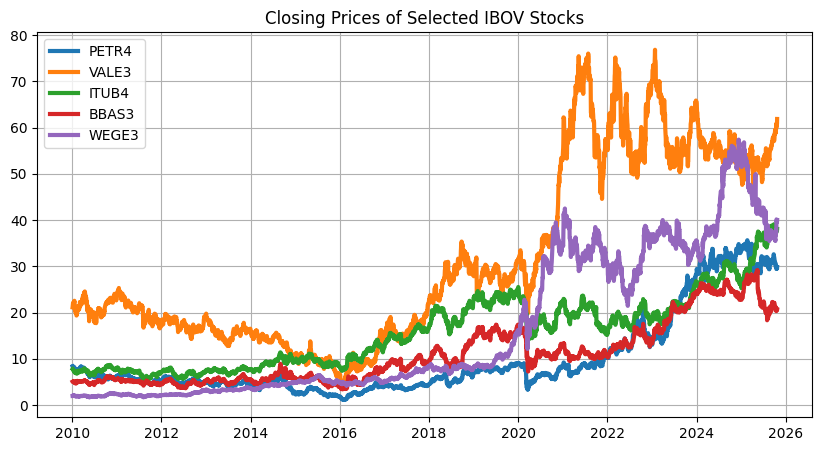

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(closingPrices.index, closingPrices['PETR4'], label='PETR4', lw = 3)
plt.plot(closingPrices.index, closingPrices['VALE3'], label='VALE3', lw = 3)
plt.plot(closingPrices.index, closingPrices['ITUB4'], label='ITUB4', lw = 3)
plt.plot(closingPrices.index, closingPrices['BBAS3'], label='BBAS3', lw = 3)
plt.plot(closingPrices.index, closingPrices['WEGE3'], label='WEGE3', lw = 3)
plt.title("Closing Prices of Selected IBOV Stocks")
plt.grid()
plt.legend()

In [6]:
closingPrices[['PETR4', 'ITUB4', 'VALE3', 'BBAS3', 'WEGE3']].pct_change().round(6).tail(10) * 100

,PETR4,ITUB4,VALE3,BBAS3,WEGE3
2025-10-09,-1.4356,-0.1611,-0.1520,0.3314,4.7887
2025-10-10,-0.8937,-0.1076,-0.4060,-2.7371,-1.3710
2025-10-13,0.9686,0.4039,1.4948,1.3100,3.1344
2025-10-14,-0.6947,0.4291,0.0000,-0.8621,-1.3478
2025-10-15,-0.8994,0.0000,1.8577,-1.8358,0.2411
2025-10-16,-1.0084,-0.2403,-0.9201,0.2461,2.6991
2025-10-17,0.9508,0.3480,-0.2819,2.6019,4.4757
2025-10-20,0.0673,1.7871,1.2806,-0.6220,-1.5193
2025-10-21,-0.8067,-0.9434,-0.1642,-1.1074,0.3288
2025-10-22,1.1522,0.8201,1.7763,0.7303,0.8823
